# CS422 Course Project

## Building a Machine Learning Model for Weather Type Prediction Using Multidimensional Meteorological and Environmental Data 

## 1.Problem Definition

### 1.1 Objective

Develop a robust machine learning model to predict **"Weather Type"** (classified as **Sunny**, **Rainy**, **Cloudy**, or **Snowy**) using historical meteorological and environmental datasets. The model will leverage 11 features—including:  

- **Temperature**  
- **Humidity**  
- **Wind Speed**  
- **Precipitation (%)**  
- **Cloud Cover**  
- **Atmospheric Pressure**  
- **UV Index**  
- **Season**  
- **Visibility (km)**  
- **Location**  

—to achieve high classification accuracy. Specifically, the model will classify weather conditions into the four target categories by analyzing historical weather data, with the goal of delivering accurate predictions that can inform decision-making across various industries.  

### 1.2 Real-World Relevance  
Accurate weather type prediction underpins critical decisions across industries, enhancing safety, efficiency, and sustainability. Below is a detailed breakdown of its applications:  


#### **Agriculture: Optimizing Crop Management and Risk Mitigation**  
- **Challenge**: Weather extremes (e.g., droughts, floods, frost) threaten crop yields and global food security.  
- **Applications**:  
  - **Planting & Irrigation**: Farmers use predictions to schedule planting based on seasonal patterns (e.g., avoid planting in rainy seasons for water-sensitive crops). For instance, high Precipitation (%) and low Temperature in Winter may indicate Snowy conditions, prompting protective measures for crops.  
  - **Resource Allocation**: Predictive insights on Humidity and UV Index help optimize irrigation (e.g., reduce water use during Sunny periods with high evaporation).  
  - **Extreme Weather Resilience**: Early detection of Rainy/Snowy events via Precipitation (%) and Cloud Cover allows timely deployment of anti-hail nets or frost blankets, minimizing losses.  
- **Impact**: A 15–20% reduction in crop yield variability has been observed in regions using data-driven weather forecasts (FAO, 2023).  


#### **Transportation: Enhancing Safety and Operational Efficiency**  
- **Challenge**: Adverse weather (e.g., Snowy-induced low visibility, Rainy-related road hazards) causes delays and accidents.  
- **Applications**:  
  - **Aviation**: Airlines adjust flight routes using Wind Speed and Visibility data to avoid turbulence or Snowy runways. For example, coastal areas with high Wind Speed and Cloud Cover may signal storm risks, requiring rerouting.  
  - **Road Logistics**: Trucking companies reroute via low-risk zones during Snowy conditions in mountainous Locations, using real-time predictions to avoid icy roads.  
  - **Maritime Navigation**: High Precipitation (%) and low Atmospheric Pressure in coastal regions alert ships to potential storms, enabling proactive route adjustments.  
- **Impact**: The U.S. Federal Highway Administration reports a 30% reduction in weather-related accidents in regions using predictive traffic management systems.  


#### **Disaster Preparedness: Early Warning Systems**  
- **Challenge**: Delayed responses to extreme weather (e.g., flash floods, blizzards) exacerbate casualties and infrastructure damage.  
- **Applications**:  
  - **Flood Risk Mitigation**: High Precipitation (%) combined with low Visibility in inland areas signals Rainy-driven flood risks, triggering evacuations and sandbag deployments.  
  - **Snowstorm Response**: Cold Temperature + high Precipitation (%) in Winter predicts Snowy conditions, enabling timely salt distribution and snowplow scheduling in urban areas.  
  - **Multi-Hazard Forecasting**: Models integrating Location (e.g., mountainous vs. coastal) and Season identify high-risk zones for avalanches (Winter Snowy events) or tropical storms (Summer Rainy seasons).  
- **Impact**: Early warnings via weather models reduce disaster-related economic losses by up to 40% (World Meteorological Organization, 2022).  


#### **Energy Management: Optimizing Renewable Energy Output**  
- **Challenge**: Intermittency in solar and wind energy production depends on weather conditions.  
- **Applications**:  
  - **Solar Energy**: High UV Index and Sunny predictions optimize solar panel maintenance schedules, ensuring maximum energy capture during peak sunlight hours.  
  - **Wind Energy**: Wind Speed data helps predict turbine efficiency; low Wind Speed in Cloudy conditions may prompt maintenance, while high Wind Speed alerts teams to potential turbine stress.  
  - **Grid Scheduling**: Utilities adjust energy storage deployments based on weather forecasts (e.g., stockpiling biomass for backup during Rainy periods with low solar output).  
- **Impact**: Predictive models improve renewable energy grid integration by 12–18%, reducing reliance on fossil fuel reserves (IEA, 2023).  


#### **Event Planning and Tourism: Operational Flexibility**  
- **Challenge**: Outdoor events and tourism revenue are vulnerable to weather disruptions.  
- **Applications**:  
  - **Event Scheduling**: Outdoor concert organizers shift dates when Rainy or Snowy weather is predicted, using Humidity and Visibility data to assess attendee comfort.  
  - **Tourism Logistics**: Coastal resorts promote beach activities during Sunny periods with high Visibility, while mountain destinations leverage Snowy forecasts to market skiing seasons.  
  - **Crowd Management**: Low Visibility in Cloudy conditions may prompt safety measures at outdoor festivals, such as enhanced lighting or traffic diversions.  
- **Impact**: The tourism industry sees a 25% revenue uplift in regions using weather-driven event planning (World Travel & Tourism Council).  


## 2.Data Processing

### 2.1 Import necessary librariess

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

### 2.2 Load Dataset

In [2]:
weather_df = pd.read_csv("weather_classification_data.csv")
weather_df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [3]:
weather_df.columns

Index(['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
       'Cloud Cover', 'Atmospheric Pressure', 'UV Index', 'Season',
       'Visibility (km)', 'Location', 'Weather Type'],
      dtype='object')

In [4]:
weather_df.describe()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000
mean,19.127576,68.710833,9.832197,53.644394,1005.827896,4.005758,5.462917
std,17.386327,20.194248,6.908704,31.946541,37.199589,3.856600,3.371499
min,-25.000000,20.000000,0.000000,0.000000,800.120000,0.000000,0.000000
25%,4.000000,57.000000,5.000000,19.000000,994.800000,1.000000,3.000000
50%,21.000000,70.000000,9.000000,58.000000,1007.650000,3.000000,5.000000
75%,31.000000,84.000000,13.500000,82.000000,1016.772500,7.000000,7.500000
max,109.000000,109.000000,48.500000,109.000000,1199.210000,14.000000,20.000000


### 2.3 Visualization On Dataset

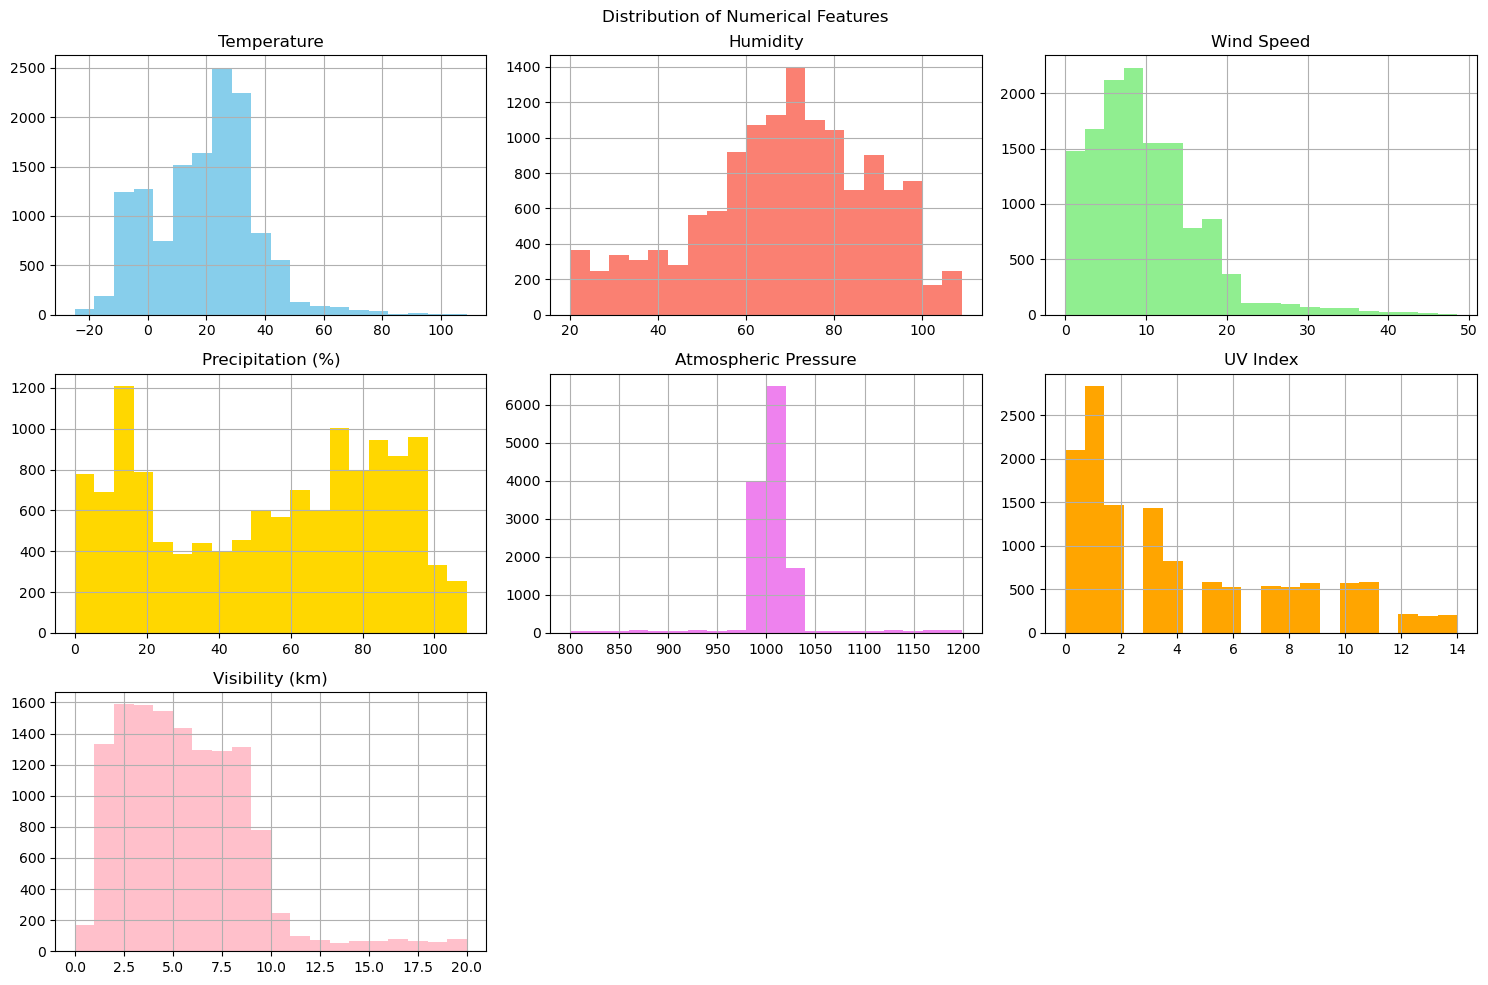

In [5]:
numerical_cols = ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)', 'Atmospheric Pressure', 'UV Index', 'Visibility (km)']
colors = ['skyblue', 'salmon', 'lightgreen', 'gold', 'violet', 'orange', 'pink']

axes = weather_df[numerical_cols].hist(bins=20, figsize=(15,10), layout=(3,3))
for ax, col, color in zip(axes.ravel(), numerical_cols, colors):
    ax.clear()  
    weather_df[col].hist(bins=20, ax=ax, color=color)
    ax.set_title(col)
plt.suptitle('Distribution of Numerical Features')
plt.tight_layout()
plt.show()

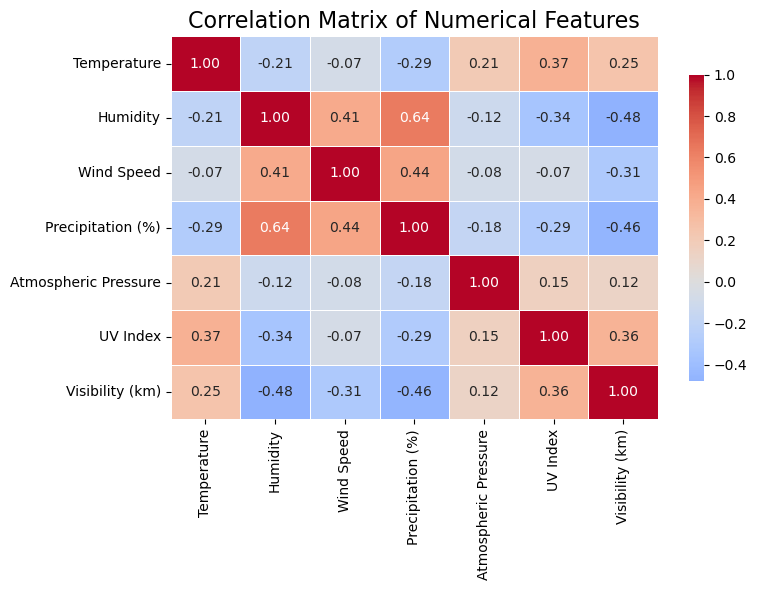

In [6]:
correlation_matrix = weather_df[numerical_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            fmt=".2f", linewidths=.5, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()

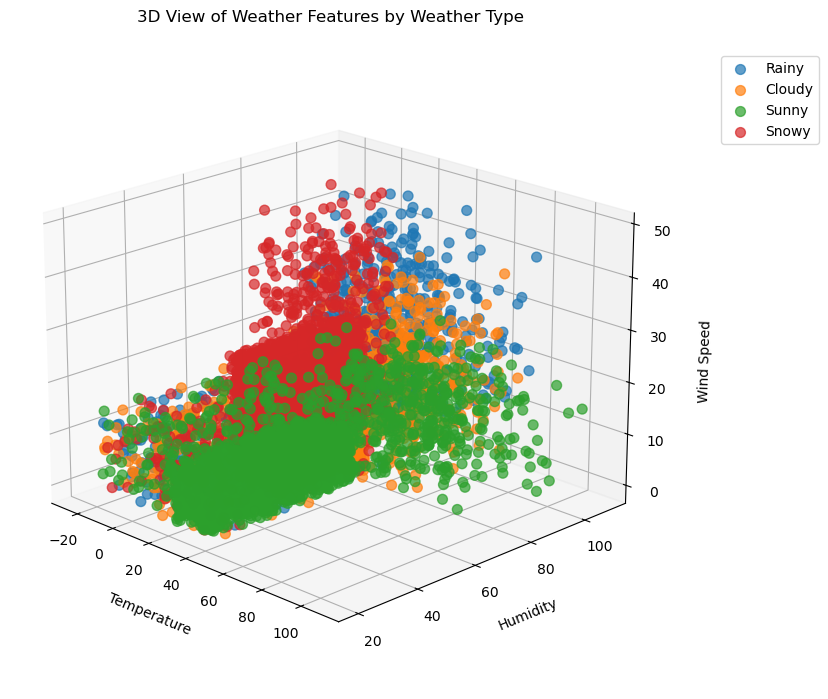

In [7]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,8)) 
ax = fig.add_subplot(111, projection='3d')

for weather_type in weather_df['Weather Type'].unique():
    subset = weather_df[weather_df['Weather Type'] == weather_type]
    ax.scatter(subset['Temperature'], subset['Humidity'], subset['Wind Speed'], 
               label=weather_type, alpha=0.7, s=50)

ax.set_xlabel('Temperature', labelpad=10)
ax.set_ylabel('Humidity', labelpad=10)
ax.set_zlabel('Wind Speed', labelpad=10) 
ax.set_title('3D View of Weather Features by Weather Type', pad=20)
ax.legend(bbox_to_anchor=(1.1, 1), loc='upper left') 
plt.subplots_adjust(left=0, right=0.9, bottom=0.1, top=0.9)  
ax.view_init(elev=20, azim=-45) 
plt.show()

**Weather Type Characteristics**:
Points of different weather types (Rainy, Cloudy, Sunny, Snowy) form distinct clusters in the 3D space of Temperature, Humidity, and Wind Speed, showing differences among weather types.
Sunny days (green) have relatively concentrated temperatures indicating stability, low humidity with dry air, and generally low wind speeds for calm weather. Rainy days (blue) feature a wide temperature range affected by various factors, high humidity as expected, and varying wind speeds from gentle to strong. Cloudy days (orange) have moderately spread temperatures, relatively high but lower - than - rainy - day humidity, and evenly distributed wind speeds. Snowy days (red) are characterized by low temperatures as a key feature, humidity at a certain level, and variable wind speeds that can be high in storms.


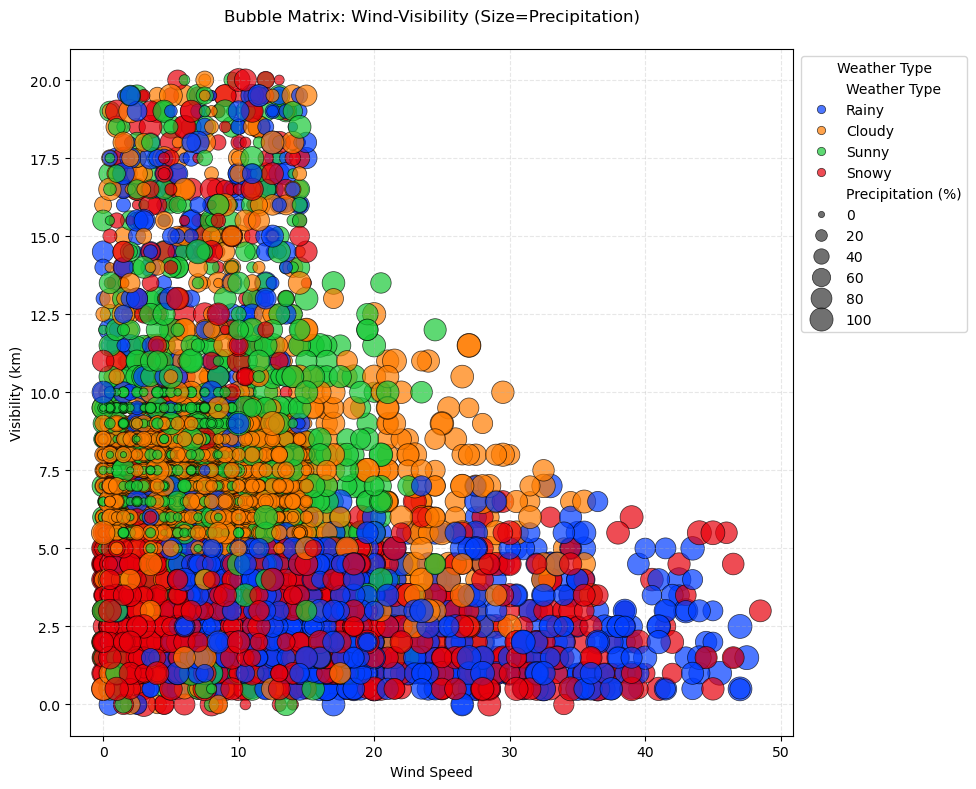

In [8]:
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=weather_df,
    x='Wind Speed',
    y='Visibility (km)',
    size='Precipitation (%)',
    hue='Weather Type',
    sizes=(20, 300),
    palette='bright',  
    alpha=0.7,
    edgecolor='black'   
)

plt.title('Bubble Matrix: Wind-Visibility (Size=Precipitation)', pad=20)
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend(bbox_to_anchor=(1.25, 1), title='Weather Type')
plt.tight_layout()
plt.show()

This **bubble matrix** diagram illustrates the relationships among wind speed, visibility, precipitation and weather types. Bubbles of different colors represent different weather types, and their sizes correspond to precipitation.  

- Sunny days mostly appear in the area with low wind speed and high visibility.  
- Cloudy days have a wide distribution in wind speed and a broad range in visibility.  
- Rainy days are present in all intervals, with a higher concentration in low - visibility areas.  
- Snowy days are concentrated in the low - to - medium wind speed range with relatively low visibility.  

### 2.4 Check Missing Values and Target Class Size

In [9]:
weather_df.isnull().any()

Temperature             False
Humidity                False
Wind Speed              False
Precipitation (%)       False
Cloud Cover             False
Atmospheric Pressure    False
UV Index                False
Season                  False
Visibility (km)         False
Location                False
Weather Type            False
dtype: bool

In [10]:
print(weather_df["Weather Type"].value_counts())

Weather Type
Rainy     3300
Cloudy    3300
Sunny     3300
Snowy     3300
Name: count, dtype: int64


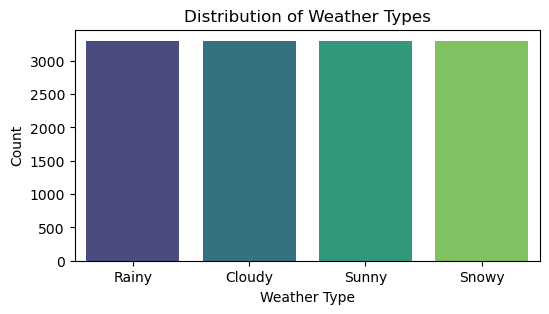

In [11]:
plt.figure(figsize=(6,3))
sns.countplot(data=weather_df, x='Weather Type', hue='Weather Type', palette='viridis', legend=False)
plt.title('Distribution of Weather Types')
plt.xlabel('Weather Type')
plt.ylabel('Count')
plt.show()

### 2.5 Label Encoding for Categorical Data

In [12]:
categorical_cols = ['Cloud Cover', 'Season', 'Location']
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    weather_df[col] = le.fit_transform(weather_df[col])
    label_encoders[col] = le

# Encode target variable
weather_df['Weather Type'] = LabelEncoder().fit_transform(weather_df['Weather Type'])

### 2.6 Checking for Outliers

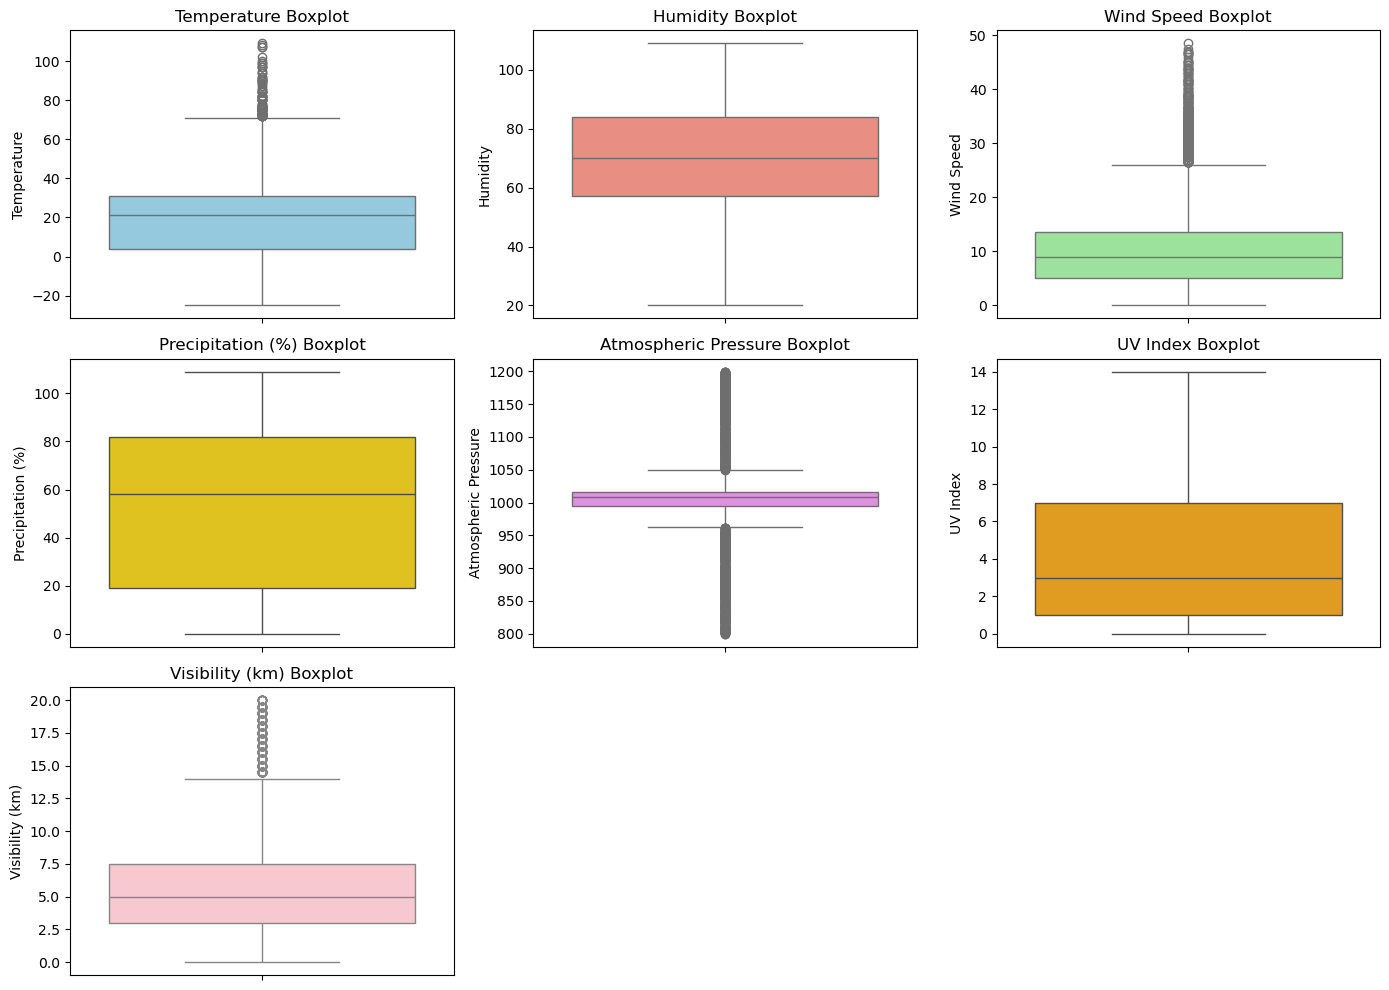

In [13]:
# Define numeric features to check
num_cols = [
    'Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
    'Atmospheric Pressure', 'UV Index', 'Visibility (km)'
]

# Define a list of distinct colors for each boxplot
colors = ['skyblue', 'salmon', 'lightgreen', 'gold', 'violet', 'orange', 'pink']

# Plot boxplots
plt.figure(figsize=(14, 10))
for index, (col, color) in enumerate(zip(num_cols, colors), start=1):
    plt.subplot(3, 3, index)
    sns.boxplot(y=weather_df[col], color=color)
    plt.title(f'{col} Boxplot')
    plt.tight_layout()
plt.show()

### 2.7 Remove Outliers


Our dataset removes outliers using the **Inter - Quartile Range (IQR)** method. The function **remove_outliers** takes a weather data DataFrame (**weather_df**) and a list of column names (**columns**) to be processed as parameters. After making a copy of the data, for each column, it sequentially calculates the first quartile (Q1), the third quartile (Q3), and then derives the IQR. Based on this, it determines the lower bound (**Q1 - 1.5 * IQR**) and upper bound (**Q3 + 1.5 * IQR**) for outlier identification. Subsequently, data rows in each column that fall outside this upper and lower bound range are filtered out from the DataFrame, and the number of outliers removed from each column is output. Finally, a cleaned DataFrame (**cleaned_df**) without outliers is returned.

In [14]:
def remove_outliers(weather_df, columns):
    cleaned_df = weather_df.copy()
    for col in columns:
        Q1 = cleaned_df[col].quantile(0.25)
        Q3 = cleaned_df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        bef = cleaned_df.shape[0]
        cleaned_df = cleaned_df[(cleaned_df[col] >= lower) & (cleaned_df[col] <= upper)]
        aft = cleaned_df.shape[0]
        print(f"Removed {bef - aft} outliers from '{col}'")
    return cleaned_df

cleaned_df = remove_outliers(weather_df, num_cols)

Removed 92 outliers from 'Temperature'
Removed 0 outliers from 'Humidity'
Removed 396 outliers from 'Wind Speed'
Removed 0 outliers from 'Precipitation (%)'
Removed 927 outliers from 'Atmospheric Pressure'
Removed 112 outliers from 'UV Index'
Removed 87 outliers from 'Visibility (km)'


In [15]:
cleaned_df["Weather Type"].value_counts()

Weather Type
0    2960
3    2941
2    2875
1    2810
Name: count, dtype: int64

### 2.8 StandardScaler Processing

In [16]:
num_cols_to_scale = ['UV Index', 'Wind Speed','Visibility (km)']
scaler = StandardScaler()
cleaned_df[num_cols_to_scale] = scaler.fit_transform(cleaned_df[num_cols_to_scale])

### 2.9 Create new features for feature engineering

To better implement model, we can create a new column named **Weather Severity Index** by way of weighted summation, where Temperature is assigned a weight of 0.4, both Humidity and Wind Speed 0.3 each, and Visibility (km) 0.2. It then displays the first few rows of the processed dataset.

In [17]:
cleaned_df['Weather Severity Index'] = (
    0.4 * cleaned_df['Temperature'] +
    0.3 * cleaned_df['Humidity'] +
    0.3 * cleaned_df['Wind Speed']+
    0.2 * cleaned_df['Visibility (km)']
)

cleaned_df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type,Weather Severity Index
0,14.0,73,0.056064,82.0,3,1010.82,-0.437048,3,-0.620631,1,1,27.392693
1,39.0,96,-0.122803,71.0,3,1011.43,0.999527,1,1.878919,1,0,44.738943
2,30.0,64,-0.391103,16.0,0,1018.72,0.424897,1,0.148461,2,3,31.112361
3,38.0,83,-1.374870,82.0,0,1026.25,0.999527,1,-1.581996,0,3,39.371140
4,27.0,74,1.397564,66.0,2,990.67,-0.724363,3,-1.005177,2,1,33.218234


## 3.Model Implementation

### 3.1 Determine The Optimal Model

The following models are potential for Weather Type Classification:

**Logistic Regression**:
   - Simple and interpretable
   - Works well for binary classification but less effective for multi-class problems
   - Assumes linear relationship between features and log-odds
   - May struggle with complex patterns in weather data

**Decision Trees**:
   - Easy to interpret and visualize
   - Can handle both numerical and categorical data
   - Prone to overfitting with complex trees
   - High variance (small changes in data can lead to very different trees)

**Support Vector Machines (SVM)**:
   - Effective in high-dimensional spaces
   - Works well with clear margin of separation
   - Can become computationally expensive with large datasets
   - Requires careful tuning of kernel and parameters

**Random Forest**:
   - Ensemble method that builds multiple decision trees
   - Reduces variance compared to single decision trees
   - Handles both numerical and categorical features well
   - Provides feature importance measures
   - Robust to outliers and noise in data

For the weather classification task, **Random Forest** is particularly well-suited because:

**Handles Mixed Data Types**: The dataset contains both numerical (temperature, humidity) and categorical (location, season) features which Random Forest handles naturally.

**Feature Importance**: Random Forest can identify which weather indicators (temperature, humidity, etc.) are most predictive of weather type, providing valuable insights.

**Robustness**: Weather data often contains outliers and noise (like the 78°C and -24°C temperature readings), which Random Forest handles well due to its ensemble nature.

**Non-linear Relationships**: Weather patterns often have complex, non-linear relationships that Random Forest can capture better than linear models.

**Multi-class Classification**: With multiple weather types (Rainy, Cloudy, Sunny, Snowy), Random Forest performs well without needing special adjustments.

**Avoids Overfitting**: By averaging multiple trees, Random Forest reduces the risk of overfitting compared to single decision trees.

Specifically, in the Part 5(**Model comparision**), we compared the predictive performance of multiple models and concluded that random forest is the best choice

### 3.2 Hyperparameter Tuning (Random Forest)

Our solution employs a **Sequential Grid Search** method for parameter optimization, with the following core strategies:
#### - Single-parameter Iteration with Greedy Selection:
This implementation follows a greedy sequential optimization strategy where we tune one hyperparameter at a time while keeping others fixed. The algorithm works by:
- Starting with initial default values for all parameters (n_estimators=100, max_depth=None, etc.)
- Selecting one parameter to optimize at each step from the set {n_estimators, max_depth, min_samples_split, max_features, bootstrap}
- Conducting a full grid search only on the selected parameter while using the current best values for all other parameters
- Permanently updating the best parameter set with the optimal value found for the current parameter
- Moving to the next parameter in sequence
The "greedy" nature comes from making locally optimal choices at each step without backtracking or considering parameter interactions. This approach is computationally efficient (O(n) complexity vs O(n^k) for full grid search) 

#### - Sequential Propagation with Optimal Path Retention:
The implementation maintains and propagates optimal values through the tuning process:

- A **best_params** dictionary serves as the carrier of optimal values throughout the sequential tuning process
- After each parameter's grid search completes, the best value immediately updates the **best_params** dictionary
- These updated values then become the fixed values used when tuning subsequent parameters
- The propagation is unidirectional - once a parameter is tuned, its value isn't revisited unless the entire process is restarted

This approach ensures that each new parameter optimization builds upon the previously found optimal values, creating a cumulative improvement effect. However, the order of parameter tuning : n_estimators → max_depth → min_samples_split → max_features → bootstrap
#### - Visual Validation of Optimization Trajectories:
The code generates a comprehensive visualization that serves multiple validation purposes:

- **Parameter-Specific Performance Plots**: Each subplot shows the accuracy landscape for one parameter, with:
  - Line plots for numeric parameters (n_estimators, max_depth, min_samples_split)
  - Bar charts for categorical parameters (max_features, bootstrap)
  - Distinct colors for easy parameter identification

- **Optimization Progress Tracking**: The series of subplots represents the historical trajectory of the tuning process, showing how each parameter was optimized in sequence

The visual validation complements the numerical results by providing intuitive understanding of the parameter importance and optimization behavior, enabling human verification of the automated tuning process.validation of the automated tuning process.optimization process.

------------------------------------------------------------------------------------------------------------------------------------

| Hyperparameter | Search Range | Description |
|---------------|--------------|-------------|
| `n_estimators` | 50-250 (step 10) | Number of decision trees |
| `max_depth` | 5-25 (step 1) | Maximum depth of individual trees |
| `min_samples_split` | 2-12 (step 1) | Minimum samples required to split a node |
| `max_features` | ['sqrt', 'log2', None] | Feature selection method |
| `bootstrap` | [True, False] | Sampling method |

----------------------------------------------------------------------------------------------------------------------------------------

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 2 candidates, totalling 10 fits


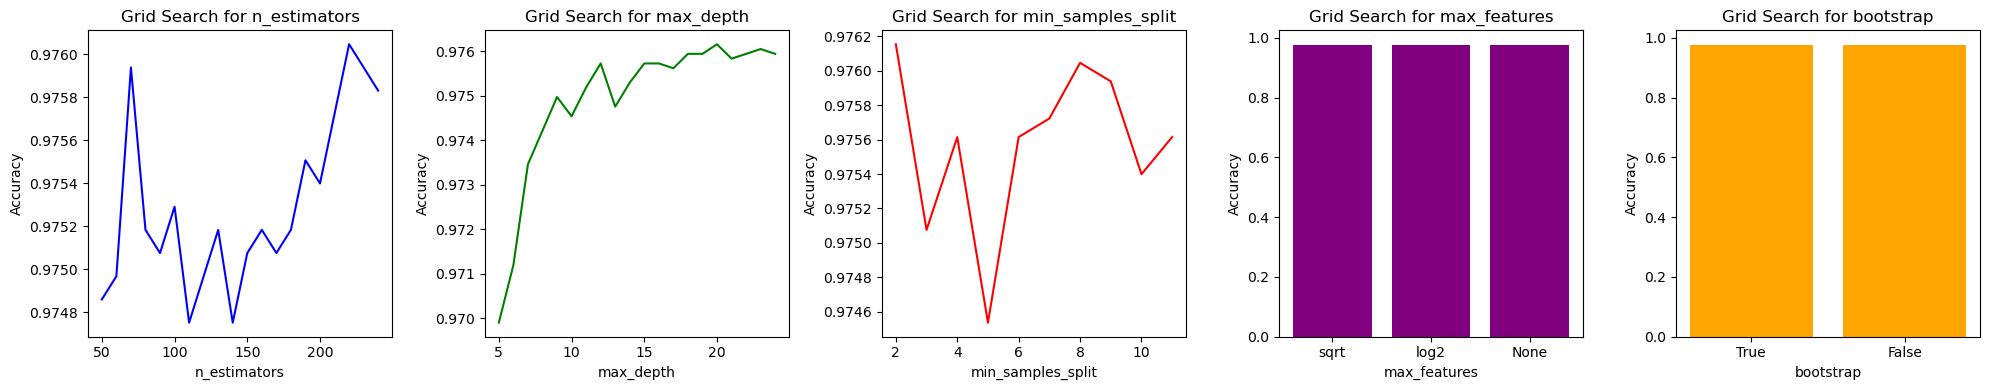

Best Params: {'n_estimators': 220, 'max_depth': 20, 'min_samples_split': 2, 'max_features': 'sqrt', 'bootstrap': True}


In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Split features and labels
X = cleaned_df.drop("Weather Type", axis=1)
y = cleaned_df["Weather Type"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define the initial parameter grid
param_grid_base = {
    'n_estimators': np.arange(50, 250, 10),  # From 50 to 250, step size is 10
   'max_depth': np.arange(5, 25, 1),  # From 5 to 20, step size is 1
   'min_samples_split': np.arange(2, 12, 1),  # From 2 to 12, step size is 1
   'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

# Define the initial parameter settings, select a group randomly first
best_params = {
    'n_estimators': 100,
   'max_depth': None,
   'min_samples_split': 2,
   'max_features':'sqrt',
    'bootstrap': True
}

# Create a large canvas containing all subplots
fig, axes = plt.subplots(1, len(param_grid_base), figsize=(20, 4))

# Define a list of distinct colors for each parameter
colors = ['blue', 'green', 'red', 'purple', 'orange']

# Tune each parameter sequentially
parameters = ['n_estimators','max_depth','min_samples_split','max_features', 'bootstrap']
for i, param in enumerate(parameters):
    param_grid = {param: param_grid_base[param]}

    # Fix other parameters
    for p, value in best_params.items():
        if p != param:
            param_grid[p] = [value]

    grid_search = GridSearchCV(
        RandomForestClassifier(random_state=42),
        param_grid,
        cv=5,
        scoring='accuracy',
        n_jobs=-1,
        verbose=1
    )

    grid_search.fit(X_train, y_train)

    # Update the best parameter
    best_params[param] = grid_search.best_params_[param]

    # Visualize the tuning results of the current parameter
    param_values = param_grid_base[param]
    mean_test_scores = grid_search.cv_results_['mean_test_score']

    ax = axes[i]
    if isinstance(param_values[0], str) or isinstance(param_values[0], bool):
        x = np.arange(len(param_values))
        ax.bar(x, mean_test_scores, color=colors[i])
        ax.set_xticks(x)
        ax.set_xticklabels([str(val) for val in param_values])
    else:
        ax.plot(param_values, mean_test_scores, color=colors[i])
    ax.set_xlabel(param)
    ax.set_ylabel('Accuracy')
    ax.set_title(f'Grid Search for {param}')

plt.tight_layout()
plt.show()

print("Best Params:", best_params)

----------------------------------------------------------------------

### 3.2 Implement Best Model

In [19]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Step 1: Rebuild the best model
best_rf = RandomForestClassifier(
    max_depth=20,
    max_features='sqrt',
    min_samples_split=2,
    n_estimators=220,
    random_state=42
)

# Step 2: Fit on training data
best_rf.fit(X_train, y_train)

# Step 3: Predict on test set
y_pred = best_rf.predict(X_test)

# Get all classes
classes = np.unique(y_test)
num_classes = len(classes)

------------------------------------------------------------------------------------------------------------------

## 4. Evaluation metrics with Analysis

### 4.1 Precision & recall & F1-score

In [20]:
# Initialize lists to store metrics
precision_list = []
recall_list = []
f1_list = []
support_list = []

for cls in classes:
    # True positives (TP)
    tp = np.sum((y_test == cls) & (y_pred == cls))
    # False positives (FP)
    fp = np.sum((y_test != cls) & (y_pred == cls))
    # False negatives (FN)
    fn = np.sum((y_test == cls) & (y_pred != cls))
    # Support
    support = np.sum(y_test == cls)

    if tp + fp == 0:
        precision = 0
    else:
        precision = tp / (tp + fp)
    precision_list.append(precision)

    if tp + fn == 0:
        recall = 0
    else:
        recall = tp / (tp + fn)
    recall_list.append(recall)

    # Calculate F1-score
    if precision + recall == 0:
        f1 = 0
    else:
        f1 = 2 * (precision * recall) / (precision + recall)
    f1_list.append(f1)

    support_list.append(support)

# Calculate overall accuracy
accuracy = np.sum(y_test == y_pred) / len(y_test)

# Calculate macro-average
macro_precision = np.mean(precision_list)
macro_recall = np.mean(recall_list)
macro_f1 = np.mean(f1_list)

# Calculate weighted-average
total_support = np.sum(support_list)
weighted_precision = np.sum(np.array(precision_list) * np.array(support_list) / total_support)
weighted_recall = np.sum(np.array(recall_list) * np.array(support_list) / total_support)
weighted_f1 = np.sum(np.array(f1_list) * np.array(support_list) / total_support)

print("                precision    recall  f1-score   support")
for i, cls in enumerate(classes):
    print(f"{cls:>14}     {precision_list[i]:.2f}      {recall_list[i]:.2f}      {f1_list[i]:.2f}       {support_list[i]}")

print(f"\n    accuracy                           {accuracy:.2f}       {total_support}")
print(f"   macro avg       {macro_precision:.2f}      {macro_recall:.2f}      {macro_f1:.2f}       {total_support}")
print(f"weighted avg       {weighted_precision:.2f}      {weighted_recall:.2f}      {weighted_f1:.2f}       {total_support}")

                precision    recall  f1-score   support
             0     0.94      0.98      0.96       592
             1     0.99      0.97      0.98       562
             2     0.99      0.98      0.98       575
             3     0.99      0.96      0.98       589

    accuracy                           0.97       2318
   macro avg       0.98      0.97      0.97       2318
weighted avg       0.97      0.97      0.97       2318


#### Result Analysis
From the result table, The overall metrics indicate that the model achieves an **accuracy** of **0.97**, meaning it has a high proportion of correct predictions on the entire test set. Both the **macro-average** and **weighted-average precision**, **recall**, and **F1-score** are **0.97**, demonstrating the model's stable and excellent performance from both an arithmetic mean perspective and a perspective that accounts for class sample distribution.

------------------------------------------------------------------------------------------------------------------------------------------------------------

### 4.2 Confusion Matrix

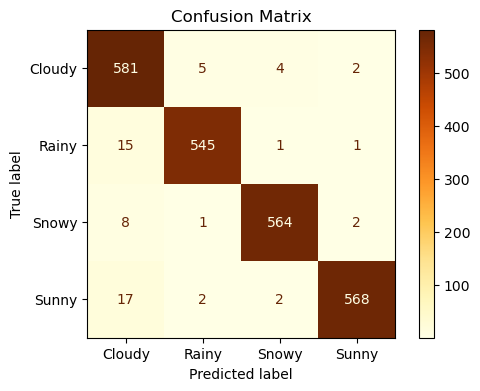

In [21]:
class_names = ['Cloudy', 'Rainy', 'Snowy', 'Sunny']
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(6, 4))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='YlOrBr', ax=ax)
plt.title("Confusion Matrix")
plt.show()

#### Whole Confusion Matrix Analysis
The confusion matrix results demonstrate that the random forest multi-class classification model performs well overall in distinguishing the four weather categories. For the **"Cloudy"** category, 581 samples were correctly predicted, with only a few misclassified as other categories. In the **"Rainy"** category, 545 samples were accurately predicted, with minimal misclassifications. The **"Snowy"** category had 564 correct predictions, and the **"Sunny"** category had 568 correct predictions. Although there were a small number of misclassifications, the majority of samples were accurately classified, indicating that the model is highly reliable and accurate in identifying different weather types and can effectively meet the needs of practical applications.

---------------------------------------------------------------------------------------------------------------------------------

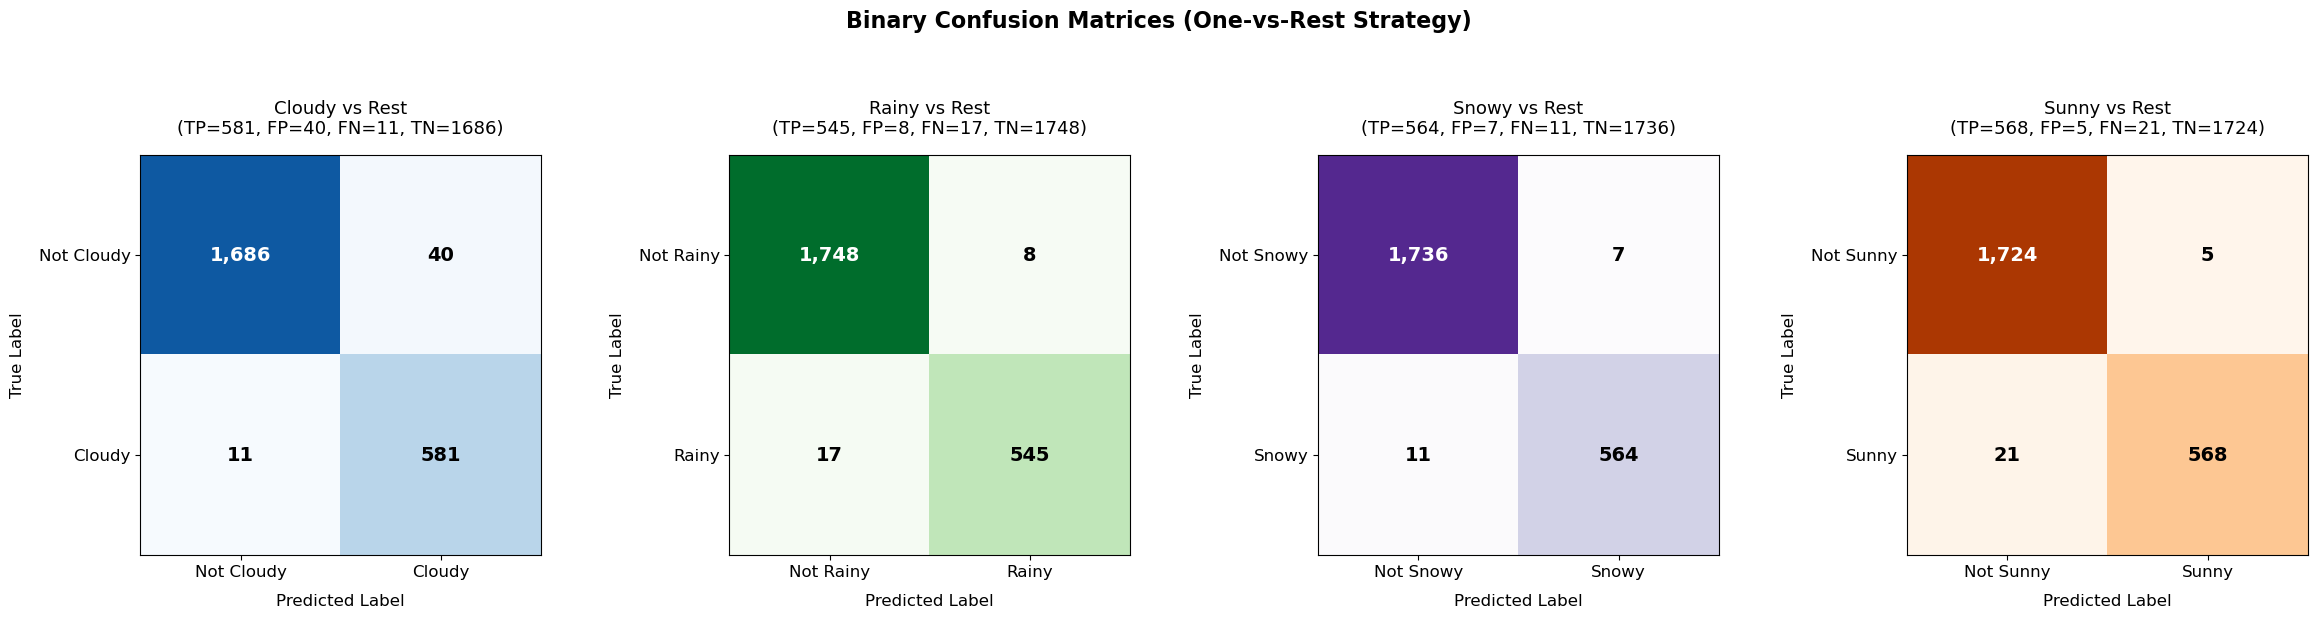

In [22]:
import numpy as np
import matplotlib.pyplot as plt

class_stats = {
    'Cloudy': {'TP': 581, 'FP': 40, 'FN': 11, 'TN': 1686},
    'Rainy':  {'TP': 545, 'FP': 8,  'FN': 17, 'TN': 1748},
    'Snowy':  {'TP': 564, 'FP': 7,  'FN': 11, 'TN': 1736},
    'Sunny':  {'TP': 568, 'FP': 5,  'FN': 21, 'TN': 1724}
}
class_names = list(class_stats.keys())

cmap_dict = {
    'Cloudy': 'Blues',
    'Rainy': 'Greens',
    'Snowy': 'Purples',
    'Sunny': 'Oranges'
}

fig, axes = plt.subplots(1, 4, figsize=(24, 6))

for i, cls in enumerate(class_names):
    stats = class_stats[cls]
    cm_binary = np.array([
        [stats['TN'], stats['FP']],
        [stats['FN'], stats['TP']]
    ])
    
    ax = axes[i]
    im = ax.imshow(cm_binary, cmap=cmap_dict[cls], vmin=0, vmax=2000)
    
    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    ax.set_xticklabels([f'Not {cls}', cls], fontsize=12)
    ax.set_yticklabels([f'Not {cls}', cls], fontsize=12)
    ax.set_xlabel('Predicted Label', fontsize=12, labelpad=10)
    ax.set_ylabel('True Label', fontsize=12, labelpad=10)
    ax.set_title(f'{cls} vs Rest\n(TP={stats["TP"]}, FP={stats["FP"]}, FN={stats["FN"]}, TN={stats["TN"]})',
                 fontsize=13, pad=15)
    
    for x in range(2):
        for y in range(2):
            value = cm_binary[y, x]
            ax.text(x, y, f'{value:,}', ha='center', va='center',
                   color='white' if value > 1000 else 'black',
                   fontsize=14, weight='bold')

plt.suptitle('Binary Confusion Matrices (One-vs-Rest Strategy)',
             y=1.02, fontsize=16, weight='bold')
plt.tight_layout(pad=3.0)
plt.show()

**Cloudy Category**:  
True Positives (TP) = 581, indicating the model accurately identified 581 cloudy samples.  
- **TPR (Recall)**: 581 / (581+11) ≈ **0.98**  
  The model successfully identified 98% of cloudy samples, with a very low miss rate.  
- **FPR (False Positive Rate)**: 40 / (40+1686) ≈ **0.023**  
  The probability of misclassifying non-cloudy samples as cloudy is 2.3%, relatively high.  
- **Misclassification Analysis**: FP (40) mainly stems from misclassifying rainy or snowy weather as cloudy, possibly due to low-light conditions; FN (11) may be caused by thinly clouded sunny days being missed.  

**Rainy Category**:  
TP = 545, correctly identifying 545 rainy samples.  
- **TPR**: 545 / (545+17) ≈ **0.97**  
  The model has high coverage for rainy weather but still misses 3%.  
- **FPR**: 8 / (8+1748) ≈ **0.0046**  
  The probability of misclassifying non-rainy days as rainy is extremely low, only 0.46%.  
- **Misclassification Analysis**: FN (17) may be light rain or brief showers not fully captured by sensors; FP (8) could be high-humidity cloudy days mistaken for rainy.  

**Snowy Category**:  
TP = 564, accurately identifying most snowy samples.  
- **TPR**: 564 / (564+11) ≈ **0.98**  
  The model excels at identifying snowy weather, with a miss rate of only 2%.  
- **FPR**: 7 / (7+1736) ≈ **0.004**  
  The probability of misclassifying non-snowy days as snowy is 0.4%, very low.  
- **Misclassification Analysis**: FP (7) may be rainy days with strong backlighting mistaken for snowy; FN (11) could be sleet weather causing classification ambiguity.  

**Sunny Category**:  
TP = 568, correctly identifying most sunny samples.  
- **TPR**: 568 / (568+21) ≈ **0.96**  
  The model has good coverage for sunny weather but a slightly higher miss rate than other categories.  
- **FPR**: 5 / (5+1724) ≈ **0.0029**  
  The probability of misclassifying non-sunny days as sunny is only 0.29%, with extremely high specificity.  
- **Misclassification Analysis**: FN (21) may be partially cloudy days mistaken for cloudy; FP (5) could be high-UV cloudy days misclassified.  

**Comprehensive Evaluation**:
   - All categories have TPR > 0.96 and FPR < 0.025, indicating balanced and reliable performance across weather types.  
   - Rainy and Snowy categories have extremely low FPR (<0.5%), making the model suitable for applications sensitive to false alarms (e.g., outdoor event planning).  

--------------------------------------------------------------------------------------------------------------------------------------------

### 4.3 Feature Importance

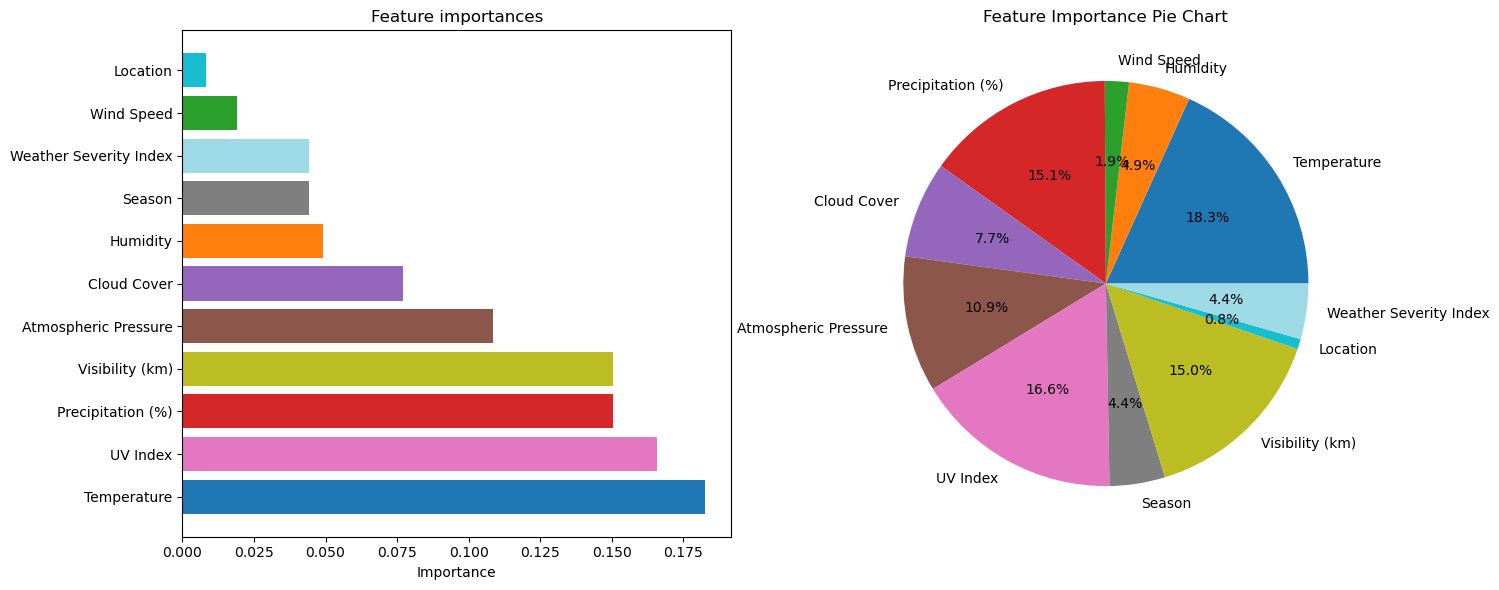

In [23]:
importances = best_rf.feature_importances_
feature_names = X_train.columns
indices = np.argsort(importances)[::-1]

colors = plt.cm.tab20(np.linspace(0, 1, len(feature_names)))

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0].barh(range(X_train.shape[1]), importances[indices], color=colors[indices], align="center")
axes[0].set_yticks(range(X_train.shape[1]))
axes[0].set_yticklabels([feature_names[i] for i in indices])
axes[0].set_xlabel('Importance')
axes[0].set_title('Feature importances')

axes[1].pie(importances, labels=feature_names, autopct='%1.1f%%', colors=colors)
axes[1].set_title('Feature Importance Pie Chart')

plt.tight_layout()
plt.show()

From the visualization of the results , we can observe such
**Key Findings:**
1. **Temperature** (18.3%) and **UV Index** (16.6%) are the dominant features with the highest impact on model predictions.
2. Secondary features include **Precipitation** (15.1%), **Visibility (km)** (15.0%)
3. Moderate contributions come from **Atmosoheric Pressure** (10.9%), **Cloud Cover** (7.7%), and **Humidty** (4.9%).
4. **Location** (0.8%) and **Wind Speed** (1.9%) have negligible influence.

**Conclusion:**  
The model prioritizes macro-level factors like Temperature ,UV Index and Precipitation, while relying less on detailed environmental metrics (Location, Wind Speed).

-----------------------------------------------------------------------------------------------------------------------------

### 4.4 ROC Curve

The ROC (Receiver Operating Characteristic) curve evaluates classifier performance by:
- Plotting **True Positive Rate (TPR)** vs **False Positive Rate (FPR)** across different probability thresholds
- Using the diagonal line (AUC=0.5) as the random guessing baseline

In our multi-classification experiment ,we provide following implementation details:
- Employs **one-vs-rest** strategy to binarize multi-class labels (`y_test_bin`)
- Computes class prediction probabilities (`y_score`) 
- Generates individual ROC curves for each class comparison (e.g., "Sunny" vs ["Cloudy","Rainy","Snowy"])

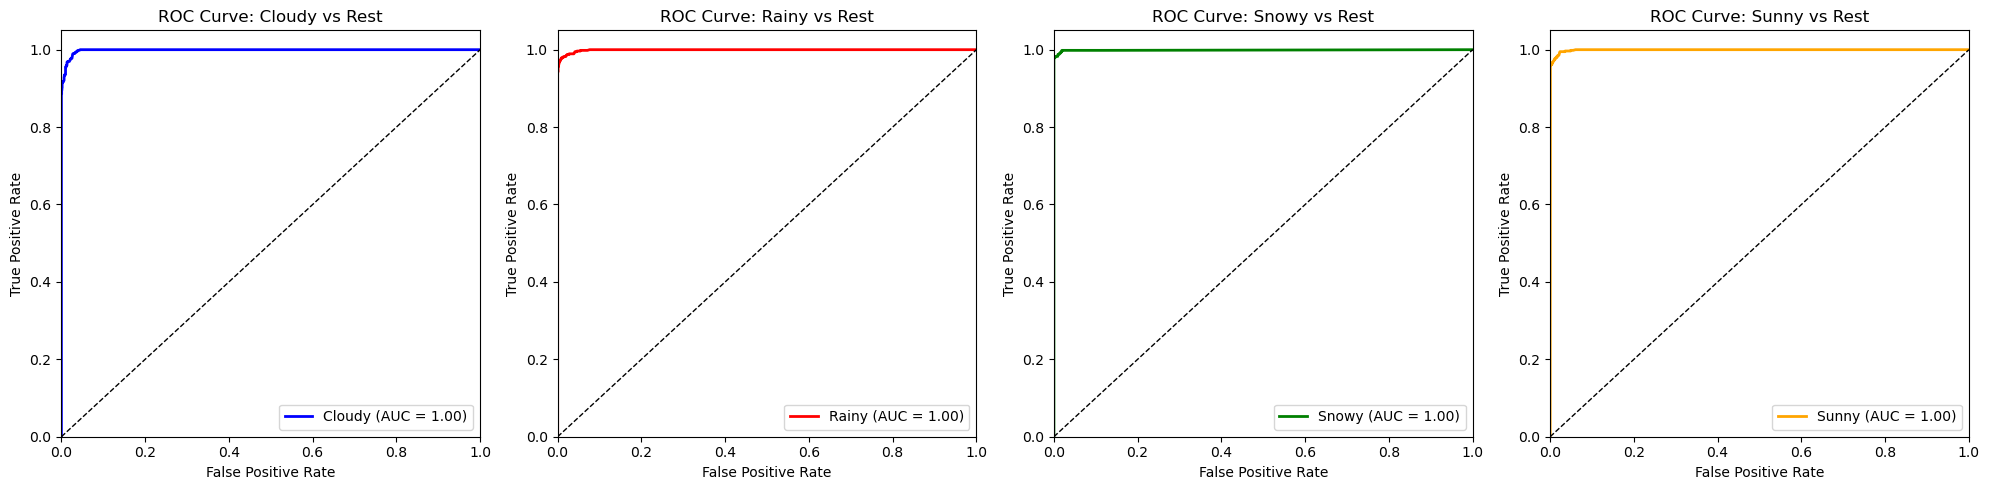

In [24]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_test_bin = label_binarize(y_test, classes=classes)
n_classes = y_test_bin.shape[1]

y_score = best_rf.predict_proba(X_test)

fig, axes = plt.subplots(1, n_classes, figsize=(20, 5))
colors = ['blue', 'red', 'green', 'orange']

class_names = ['Cloudy', 'Rainy', 'Snowy', 'Sunny'] 

for i, ax in enumerate(axes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    
    ax.plot(fpr, tpr, color=colors[i], lw=2, 
            label=f'{class_names[i]} (AUC = {roc_auc:.2f})')
    ax.plot([0, 1], [0, 1], 'k--', lw=1)
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')  
    ax.set_title(f'ROC Curve: {class_names[i]} vs Rest')
    ax.legend(loc="lower right")

plt.tight_layout()
plt.show()

#### Result Analysis

1. **AUC Values**: 
   The AUC (Area Under the Curve) values for all weather categories (Cloudy, Rainy, Snowy, Sunny) are 1.00, as shown in the figure and calculated by the code. In binary classification tasks, an AUC of 1.0 indicates perfect discriminatory power, meaning the model can completely and accurately distinguish the class from others. In this multi-class scenario, where each class is evaluated against all others (one-vs-rest), the random forest model demonstrates excellent classification performance for each weather category.

2. **ROC Curve Shapes**: 
   Each ROC curve starts at the bottom-left (0,0), rapidly ascends to the top-left (0,1), and then extends horizontally to the top-right (1,1). This shape indicates that the model achieves a high True Positive Rate (TPR) at a low False Positive Rate (FPR). Specifically, the model can accurately identify samples of the target class with minimal misclassification of other classes as the target class.

3. **Model Performance Summary**: 
   Overall, the random forest multi-class model performs extremely well in distinguishing the four weather categories. It efficiently and accurately classifies each category, exhibiting nearly perfect precision (rarely misclassifying other categories as the target) and recall (rarely missing samples from the target class). 

-------------------------------------------------------------------------------------------------------------------------------------------------------------

### 4.5 Precision-Recall Curve

The **Precision-Recall (PR)** curve is a graphical tool used to evaluate the performance of binary or multi-class classification models. The x-axis represents **Recall** (also known as Sensitivity or True Positive Rate), while the y-axis represents **Precision** (Positive Predictive Value). By varying the classification threshold, the PR curve illustrates the trade-off between Precision and Recall at different decision boundaries.  


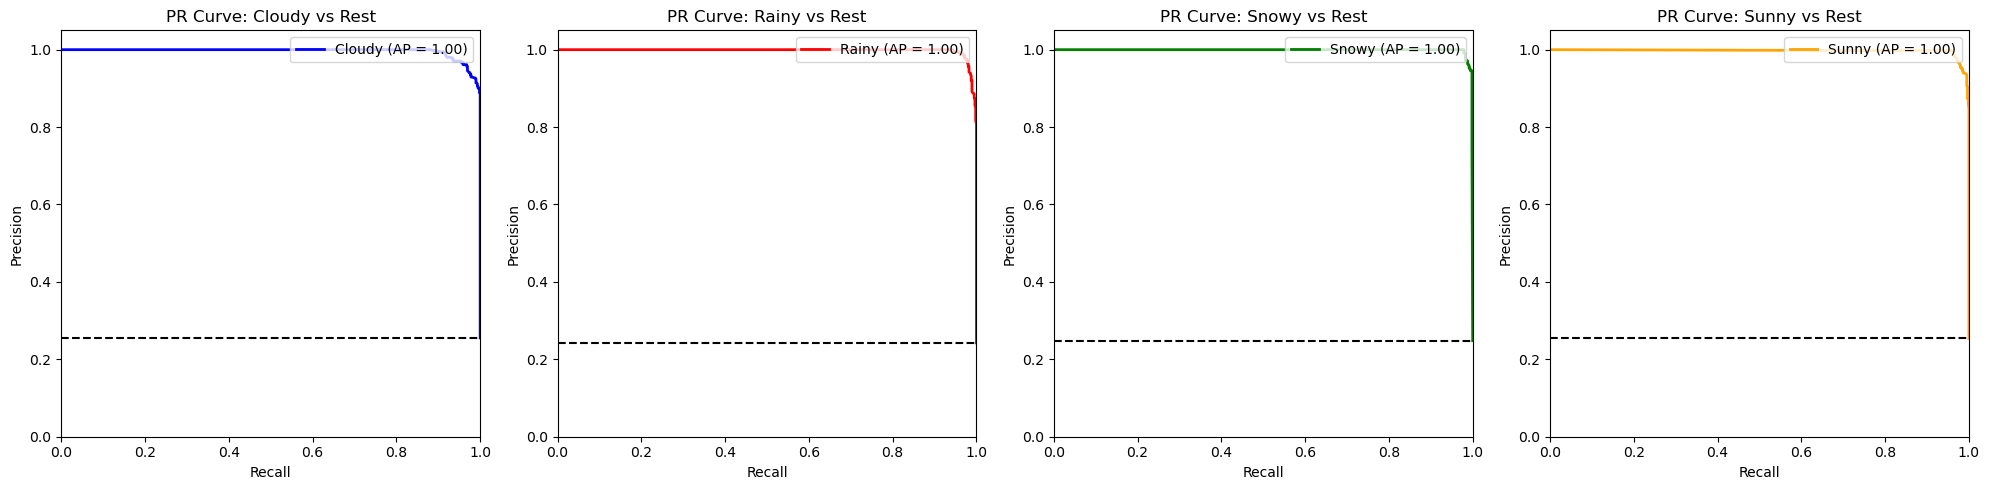

In [25]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

y_test_bin = label_binarize(y_test, classes=classes)
n_classes = y_test_bin.shape[1]
y_score = best_rf.predict_proba(X_test) 

colors = ['blue', 'red', 'green', 'orange']
class_names = ['Cloudy', 'Rainy', 'Snowy', 'Sunny']

fig, axes = plt.subplots(1, n_classes, figsize=(20, 5))

for i, ax in enumerate(axes):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_score[:, i])
    ap_score = average_precision_score(y_test_bin[:, i], y_score[:, i])
    
    ax.plot(recall, precision, color=colors[i], lw=2,
            label=f'{class_names[i]} (AP = {ap_score:.2f})')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('Recall')
    ax.set_ylabel('Precision')
    ax.set_title(f'PR Curve: {class_names[i]} vs Rest')
    ax.legend(loc="upper right") 
    
    positive_ratio = y_test_bin[:, i].mean()
    ax.axhline(y=positive_ratio, color='k', linestyle='--', 
               label=f'Baseline ({positive_ratio:.2f})')

plt.tight_layout()
plt.show()

#### Result Analysis
1.**Excellent Model Performance**:
  The average precision (AP) corresponding to the four curves is 1.00. AP is the area under the PR curve, and its value ranges from 0 to 1. The closer it is to 1, the better the performance. Here, with an AP of nearly 1.00 for all, it indicates that the model performs extremely well in distinguishing among weather categories such as "Cloudy", "Rainy", "Snowy", and "Sunny" and other categories. It can accurately identify samples of each category.

2.**High Precision and Recall**:
  The trend of the curves shows that as the recall increases from 0 to nearly 1, the precision remains at a high level (close to 1). This means that when the model predicts these weather categories, the vast majority of the samples predicted as positive are indeed positive (high precision), and at the same time, it can also identify most of the true positive samples (high recall). It shows that the model performs well in both focusing on prediction accuracy and comprehensively finding positive samples in various weather recognition tasks. 

------------------------------------------------------------

### 4.6 Learning Curve

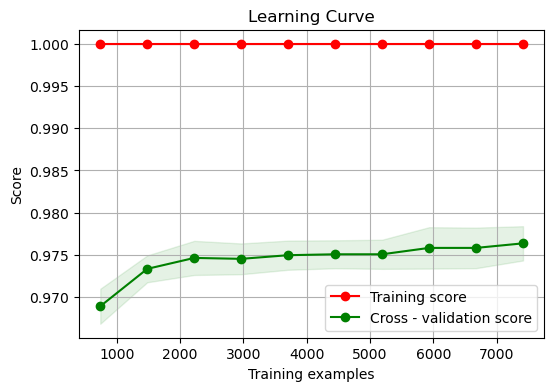

In [26]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

train_sizes, train_scores, test_scores = learning_curve(
    best_rf, X_train, y_train, cv=5, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(6, 4))
plt.title("Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross - validation score")

plt.legend(loc="best")
plt.show()

#### Model Advantage Analysis

1. **Strong Training Set Fitting Capability**: 
   The training set scores remain consistently close to 1.0 with minimal fluctuations. This clearly demonstrates the exceptional fitting ability of the random forest model when processing training data. In practical application scenarios, such as weather classification tasks, the model can accurately capture various weather feature patterns from existing large - scale weather sample data. Whether it is the light intensity and temperature changes on sunny days or the precipitation indicators on rainy days, the model can learn and remember them well, laying a solid foundation for subsequent predictions.

2. **Impressive Cross - Validation Scores**: 
   The cross - validation scores gradually increase from approximately 0.97 to nearly 0.98. Although the improvement amplitude is relatively small, the scores themselves are at a high level. This indicates that the model still has quite excellent generalization ability when facing unseen data. Taking actual weather forecasting as an example, even when encountering new weather observation data, the model can judge weather categories with relatively high accuracy, which can meet the requirements of many business scenarios with high precision requirements.

3. **Excellent Comprehensive Performance**: 
   Although there is a certain gap between the training set scores and the cross - validation scores, which suggests a possible overfitting tendency, from the perspective of actual business effects, the overall performance of the model is outstanding. In many practical applications, such as arranging agricultural activities according to weather classification in agricultural production and formulating travel recommendations according to weather classification in the tourism industry, this model can provide strong support for relevant decision - making by virtue of its powerful learning ability on the training set and relatively high accuracy on the cross - validation set, effectively promoting the efficient development of businesses.

---------------------------------------------------------------------------------------------------------------------------------

## 5 Model Comparision 

  In this section, We will utilize four different machine learning models (**Random Forest**, **K-Nearest Neighbors**, **XGBoost**, and **Logistic Regression**) to predict weather conditions (Cloudy, Rainy, Snowy, Sunny) , then evaluated on the test dataset using metrics such as **accuracy**, **F2-score**, **F1-score**, and **recall**. Finally, **confusion matrices** for all four models are visualized side-by-side to facilitate intuitive comparison of their performance in weather classification tasks.

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, fbeta_score, f1_score, recall_score, precision_score

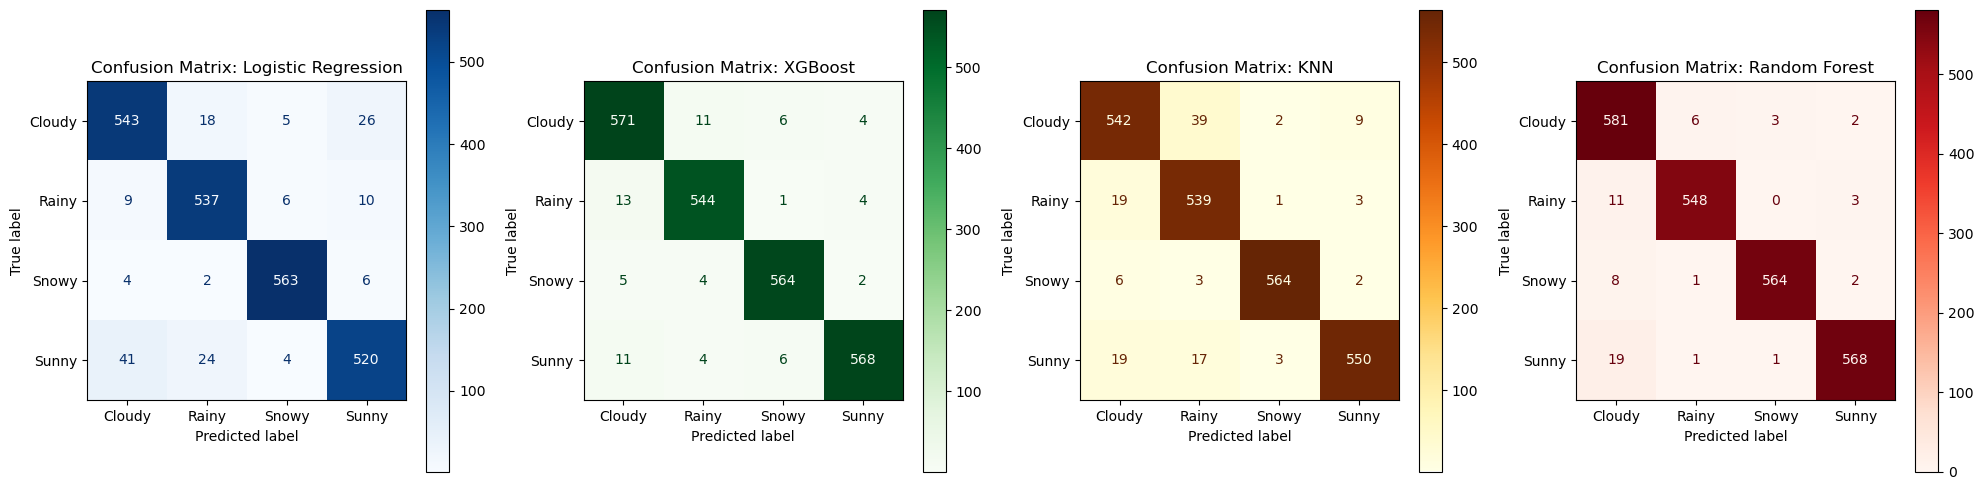

In [28]:
# RandomForest
rf_model = RandomForestClassifier(n_estimators= 220, max_depth= 20, min_samples_split= 5)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred)
f2_rf = fbeta_score(y_test, y_pred, beta=2,average='macro')
f1_rf = f1_score(y_test, y_pred, average='macro') 
recall_rf = recall_score(y_test, y_pred, average='macro') 

cm_rf = confusion_matrix(y_test, y_pred)

# KNN
knn_model = KNeighborsClassifier(n_neighbors= 12, weights='uniform', p = 1)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred)
f2_knn = fbeta_score(y_test, y_pred, beta=2,average='macro')
f1_knn = f1_score(y_test, y_pred, average='macro') 
recall_knn = recall_score(y_test, y_pred, average='macro') 

cm_knn = confusion_matrix(y_test, y_pred)

# XGBoost
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train, y_train)
y_pred = xgb_classifier.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred)
f2_xgb = fbeta_score(y_test, y_pred, beta=2,average='macro')
f1_xgb = f1_score(y_test, y_pred, average='macro') 
recall_xgb = recall_score(y_test, y_pred, average='macro') 

cm_xgb = confusion_matrix(y_test, y_pred)

# Logistic Regression
logreg_classifier = LogisticRegression(solver='saga',max_iter=5000)
logreg_classifier.fit(X_train, y_train)
y_pred = logreg_classifier.predict(X_test)

accuracy_lg = accuracy_score(y_test, y_pred)
f2_lg = fbeta_score(y_test, y_pred, beta=2,average='macro')
f1_lg = f1_score(y_test, y_pred, average='macro') 
recall_lg = recall_score(y_test, y_pred, average='macro')  

cm_lg = confusion_matrix(y_test, y_pred) 

# Visualization for Confusion Matrix
cm_list = [cm_lg, cm_xgb, cm_knn, cm_rf]
model_names = ['Logistic Regression', 'XGBoost', 'KNN', 'Random Forest']
cmap_list = ['Blues', 'Greens', 'YlOrBr', 'Reds']

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))  
for ax, cm, name, cmap in zip(axes, cm_list, model_names, cmap_list):  
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                                display_labels=['Cloudy', 'Rainy', 'Snowy', 'Sunny'])
    disp.plot(ax=ax, cmap=cmap) 
    ax.set_title(f'Confusion Matrix: {name}')
    
plt.tight_layout()  
plt.show()

In [29]:
model_results = [
    {'model': 'LinearRegression', 'accuracy': accuracy_lg, 'f2_score': f2_lg, 'f1_score': f1_lg, 'recall': recall_lg},
    {'model': 'RandomForestClassifier', 'accuracy': accuracy_rf, 'f2_score': f2_rf, 'f1_score': f1_rf, 'recall': recall_rf},
    {'model': 'KNeighborsClassifier', 'accuracy': accuracy_knn, 'f2_score': f2_knn, 'f1_score': f1_knn, 'recall': recall_knn},
    {'model': 'XGBClassifier', 'accuracy': accuracy_xgb, 'f2_score': f2_xgb, 'f1_score': f1_xgb, 'recall': recall_xgb}
]

In [30]:
df_model_results = pd.DataFrame(model_results)
display(df_model_results)

,model,accuracy,f2_score,f1_score,recall
0,LinearRegression,0.933132,0.933478,0.933288,0.933682
1,RandomForestClassifier,0.975410,0.975485,0.975670,0.975431
2,KNeighborsClassifier,0.946937,0.947176,0.947175,0.947318
3,XGBClassifier,0.969370,0.969426,0.969442,0.969429


### Conclusion:

  Judging from the results, among these models, **RandomForestClassifier** indeed performs the most prominently. Its accuracy, f2_score, f1_score, and recall are all at relatively high levels, demonstrating excellent capabilities in capturing data patterns and balancing precision and recall.

---------------------------------------------------------------------------------------------------------------------------------

# 6 Summary

#### **Overview**:
We Successfully constructed a **Random Forest-based** weather type prediction model that effectively predicts weather conditions based on historical data.

#### **Key Features**:
- We utilize **11 distinct features** for comprehensive analysis
- We achieve **high accuracy** in weather condition classification
- We deliver **reliable prediction results** for various industries

#### **Applications**:
Provides strong decision-making support for:
- Agriculture
- Transportation
- Event Planning
- Energy Sector
- And other weather-dependent industries

------------------------------------